 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [96]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [97]:
paths = {
    'algo_returns' : 'Resources/algo_returns.csv',
    'BHP' : 'Resources/BHP.csv',
    'lynas' : 'Resources/lynas.csv',
    'brickworks' : 'Resources/brickworks.csv',
    'sp_tsx_history' : 'Resources/sp_tsx_history.csv', 
    'whale_returns': 'Resources/whale_returns.csv',
    'fortescue' : 'Resources/fortescue.csv'
    }

In [98]:
# Reading whale returns and sort by date index
whale_returns = pd.read_csv(paths['whale_returns'], parse_dates= True , infer_datetime_format=True, index_col='Date')
whale_returns = whale_returns.sort_index(ascending=True)
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [99]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [100]:
# Drop nulls from whale returns
whale_returns = whale_returns.dropna()
whale_returns.isnull().sum().sum()

0

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [101]:
# Reading algorithmic returns and sort index
algo_returns = pd.read_csv(paths['algo_returns'], parse_dates= True , infer_datetime_format=True, index_col='Date')
algo_returns = algo_returns.sort_index(ascending=True)
algo_returns

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [102]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [103]:
# Drop nulls from algo returns
algo_returns = algo_returns.dropna()
algo_returns.isnull().sum().sum()

0

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [104]:
# Reading S&P TSX 60 Closing Prices sort by index
sp_tsx_history = pd.read_csv(paths['sp_tsx_history'], parse_dates= True , infer_datetime_format=True, index_col='Date')
sp_tsx_history = sp_tsx_history.sort_index(ascending=True)
sp_tsx_history

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [105]:
# Check Data Types
sp_tsx_history.dtypes

Close    object
dtype: object

In [106]:
# Fix Data Types 
sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace('[$,]', '', regex=True).astype(float)
sp_tsx_history.dtypes

Close    float64
dtype: object

In [107]:
# Calculate Daily Returns, create new column to store data
sp_tsx_history['SP TSX'] = sp_tsx_history['Close'].pct_change()
sp_tsx_history.head()

,Close,SP TSX
Date,,
2012-10-01,12370.19,NaN
2012-10-02,12391.23,0.001701
2012-10-03,12359.47,-0.002563
2012-10-04,12447.68,0.007137
2012-10-05,12418.99,-0.002305


In [108]:
# Drop nulls
sp_tsx_history = sp_tsx_history.dropna()
sp_tsx_history.isnull().sum()

Close     0
SP TSX    0
dtype: int64

In [109]:
# Drop close column
sp_tsx_history = sp_tsx_history.drop(columns= 'Close')
sp_tsx_history.head()

,SP TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [110]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
analysis = pd.concat([whale_returns, algo_returns, sp_tsx_history], axis = 'columns', join = 'inner')
analysis.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

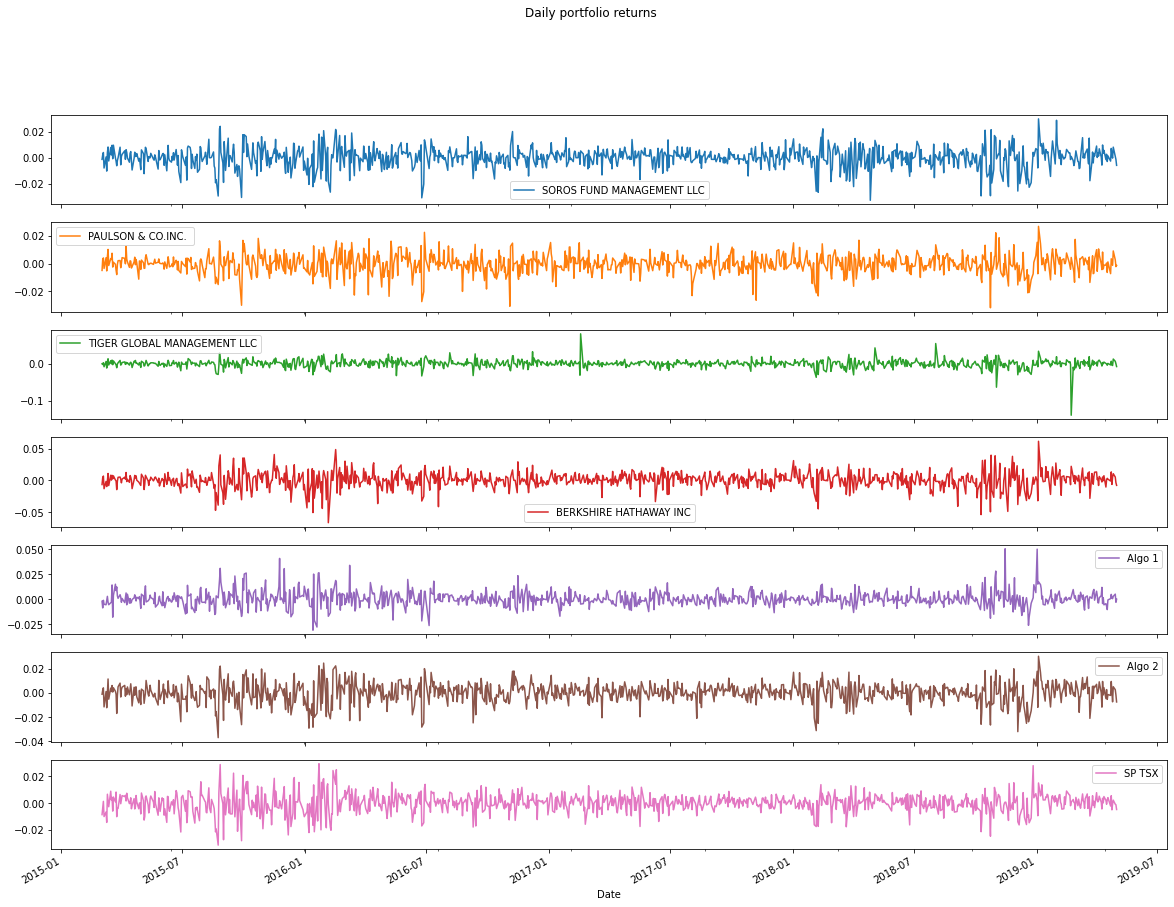

In [111]:
# Plot daily returns of all portfolios 
analysis.plot(subplots = True, figsize = (20,15), title = 'Daily portfolio returns')

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

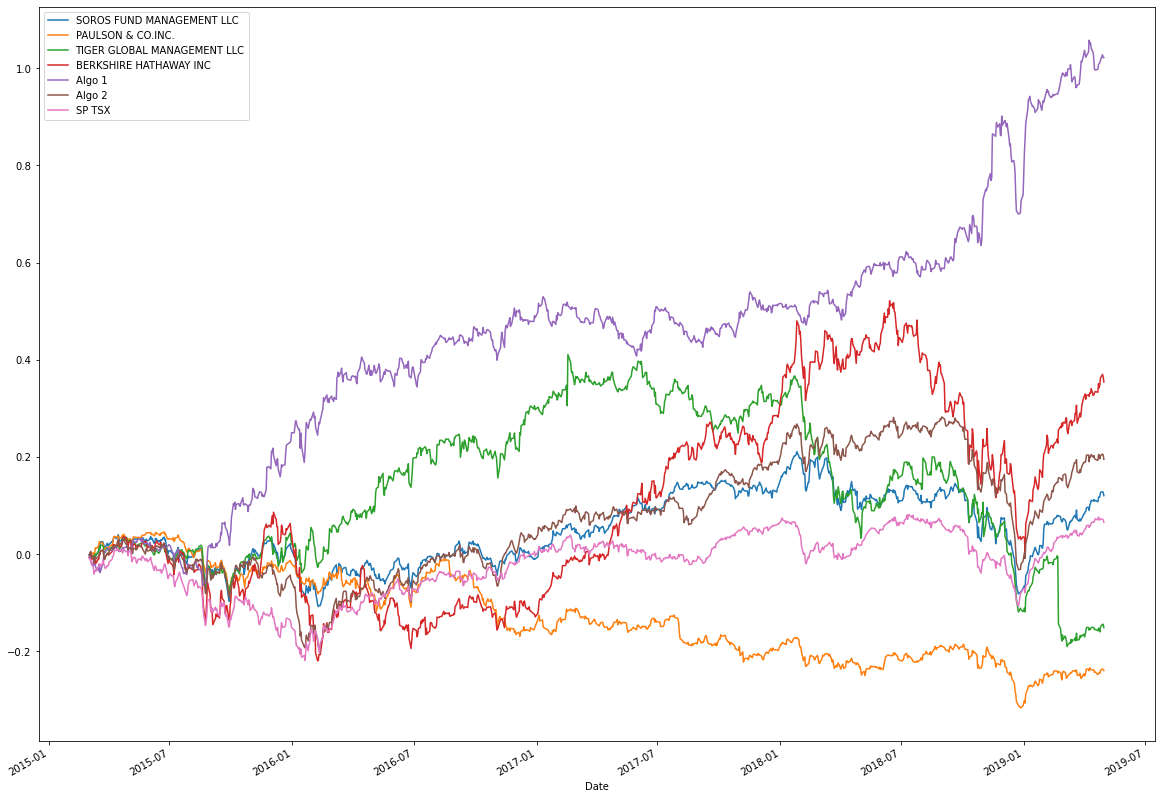

In [112]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+analysis).cumprod()-1
# Plot cumulative returns
cumulative_returns.plot(figsize = (20,15))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


Text(0, 0.5, '% Returns')

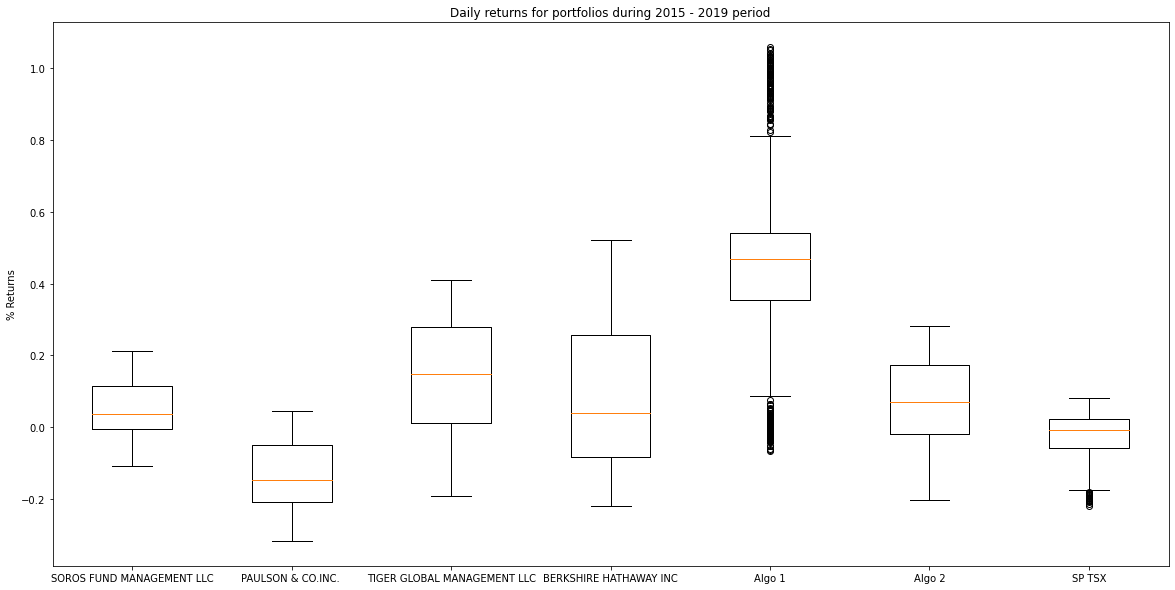

In [113]:
# Box plot to visually show risk
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.boxplot(cumulative_returns, labels=cumulative_returns.columns.tolist())
ax.set_title('Daily returns for portfolios during 2015 - 2019 period')
ax.set_ylabel('% Returns')

### Calculate Standard Deviations, Determine risk compared to SP TSX 60

(<AxesSubplot:>,
 PAULSON & CO.INC.              0.110841
 SP TSX                         0.111664
 Algo 1                         0.120470
 SOROS FUND MANAGEMENT LLC      0.124259
 Algo 2                         0.132177
 TIGER GLOBAL MANAGEMENT LLC    0.172759
 BERKSHIRE HATHAWAY INC         0.203599
 dtype: float64)

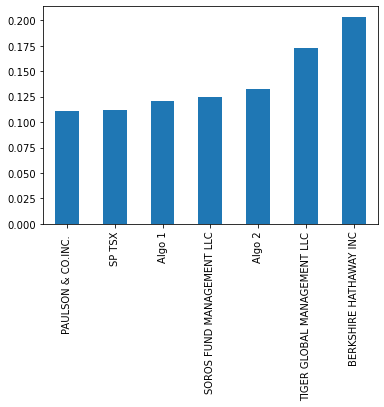

In [114]:
# Calculate the daily standard deviations of all portfolio
std_dev = analysis.std()

# sort by ascending order
std_dev = std_dev.sort_values(ascending=True)

# Calculate the annualized standard deviation (252 trading days)
std_dev = std_dev * np.sqrt(252)

# visualise volatility/risk with bar chart (higher is more risky)
std_dev.plot(kind = 'bar'), std_dev

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

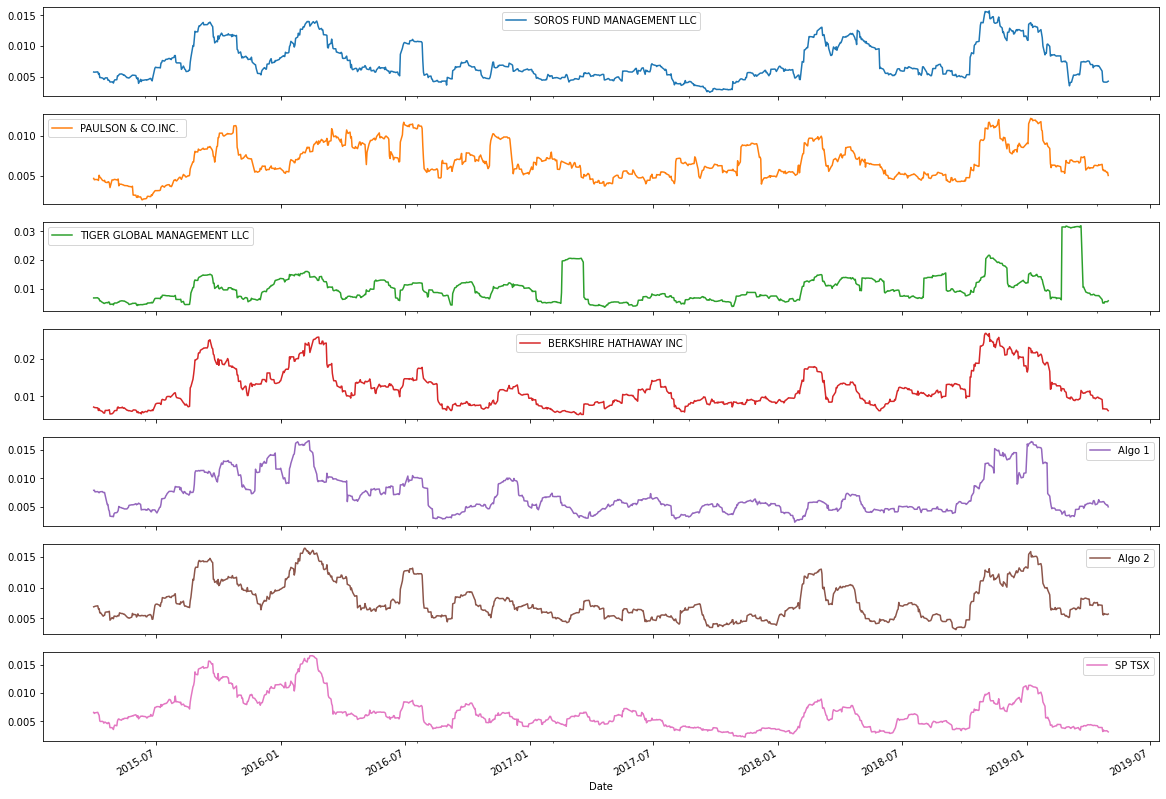

In [115]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_dev = analysis.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std_dev.plot(subplots = True, figsize = (20,15))

### Calculate and plot the correlation

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

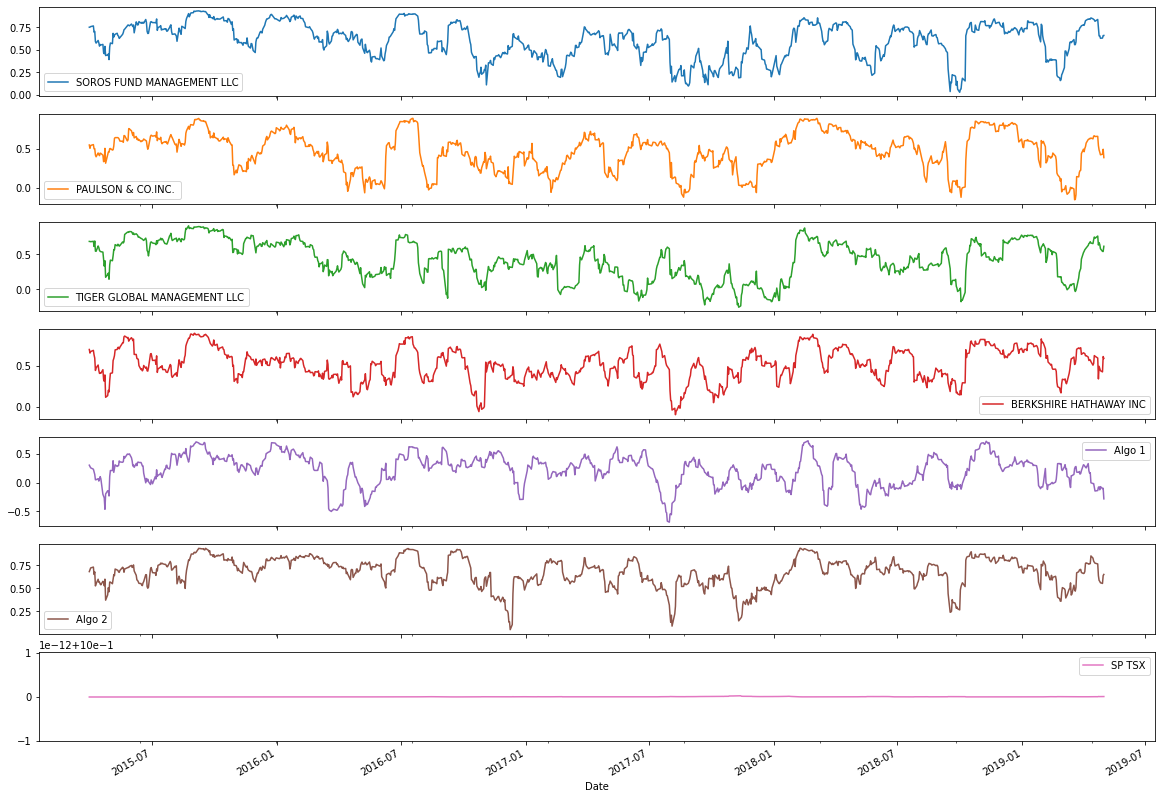

In [116]:
# Calculate and plot the rolling correlations (21 day window)
rolling_corr = analysis.rolling(window=21).corr(analysis['SP TSX'])
rolling_corr.plot(subplots = True, figsize = (20,15))

<AxesSubplot:>

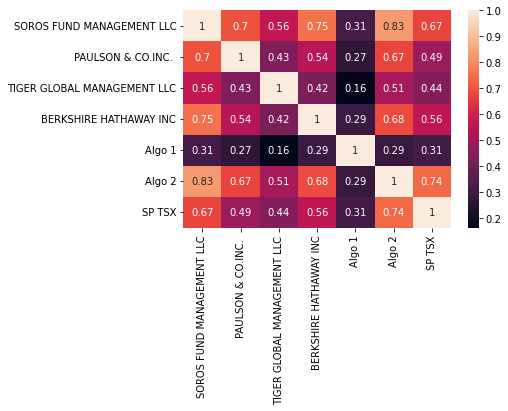

In [117]:
# Calculate correlation matrix
correlation_mtx = analysis.corr()

# Display the correlation matrix
sns.heatmap(correlation_mtx, annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

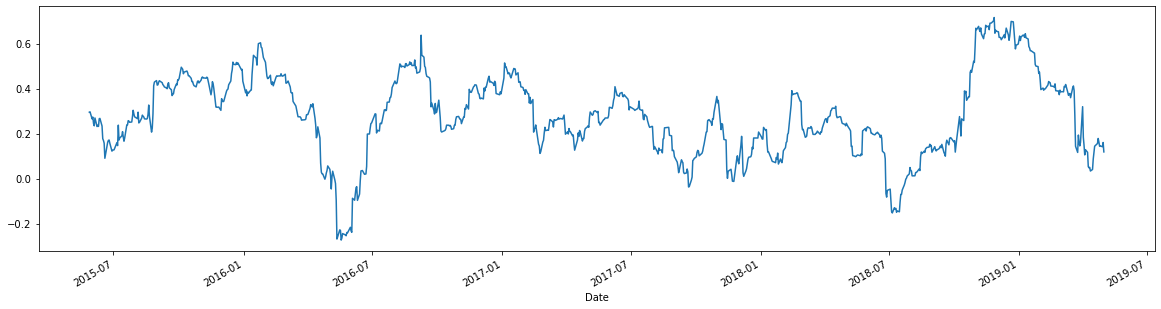

In [118]:
# Calculate covariance for Algo 1 and SP TSX (60 day window)
algo1_rolling_cov = analysis['Algo 1'].rolling(window=60).cov(analysis['SP TSX'])

# Calculate variance of S&P TSX
tsx_rolling_var = analysis['SP TSX'].rolling(window=60).var()

# Compute beta
rolling_beta = algo1_rolling_cov/tsx_rolling_var

# Plot beta trend
rolling_beta.plot(figsize = (20,5))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

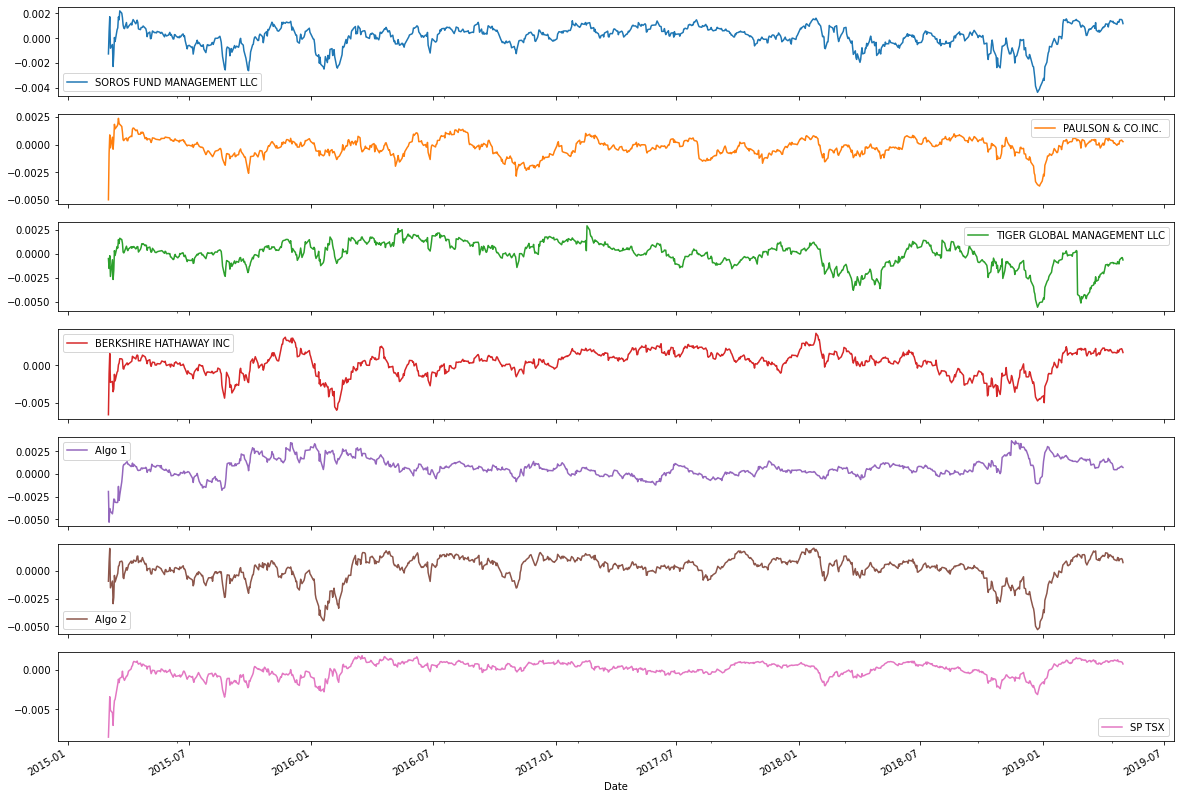

In [119]:
# Use `ewm` to calculate the rolling window
exp_rolling_average = analysis.ewm(halflife=21).mean()
exp_rolling_average.plot(subplots = True,  figsize = (20,15))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

(<AxesSubplot:>,
 PAULSON & CO.INC.             -0.547594
 TIGER GLOBAL MANAGEMENT LLC   -0.144455
 SP TSX                         0.195550
 SOROS FUND MANAGEMENT LLC      0.286709
 Algo 2                         0.396817
 BERKSHIRE HATHAWAY INC         0.467045
 Algo 1                         1.491514
 dtype: float64)

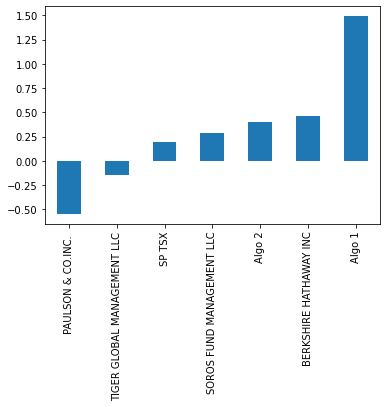

In [120]:
# Annualized Sharpe Ratios (assuming Risk free return of 0), sort values and visulise as barplot
sharpe_ratios = (analysis.mean() * 252) / (analysis.std() * np.sqrt(252))
sharpe_ratios = sharpe_ratios.sort_values(ascending=True)
sharpe_ratios.plot(kind = 'bar'), sharpe_ratios

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.
---

### Algo 1

##### Risk:
Algo 1 has an annual standard deviation 0.1204 (7.89% above the SP TSX), making this strategy the second least volatile in\
comparison to all other strategies that have been analyzed. Aside from the SP TSX, Algo 1 was the only other profile to display\
cumulative returns as outliers on the boxplot (see cell [19]), this in combination with the longest whiskers indicate\
a non-normal or multimodal distribution of the data.

##### Correlation:
The strategy behind Algo 1 displays minimal correlation with regard to the broader market, additionally, Algo 1 is the only\
strategy to display a significantly negative correlation to the SP TSX (see cell [23]), the heatmap seen in cell [24] displays\
low correlation to all other stategies. 

##### Returns:
For the given window of data, Algo 1 outperformed all funds, with a final return of 102.2% in the 2015 - 2019 period.

##### Sharpe ratio:
Algo 1 has a sharpe ratio of 1.49, placing it firmly above all other funds.

---

### Algo 2

#### Risk:
Algo 2 has an annual standard deviation of 0.1321 (18.37% above the SP TSX), making this strategy the third most volatile in\
comparison to all other strategies that have been analyzed (see cell [x]). Algo 2 displays relativly tight range of cumulative\
returns (see cell [x]).

#### Correlation:
Algo 2 correlates quite closely to the broader market and follows many of the peaks and troughs seen by the managed funds (see cell[x]).
#### Returns:
For the given window of data, Algo 2 outperformed all other managed funds, with a final return of 19.5% in the 2015 - 2019 period.
#### Sharpe ratio:
Despite solid returns, the sharpe ratio for Algo 2 was 0.40, which falls somewhere between Birkshire Hathaway and the SP TSX.\
Although the strategy provided higher than average returns for this period, it may be subject to market influences and may\
see different perfomance depending on external factors.

---

### Discussion
Based on the data above, Algo 1 and Algo 2 both outperformed the managed funds with regard to overall yeild, with Algo 1 displaying\
exceptional results. However, this is not without saying, some assumptions have been made about the equivalence of the funds being\
managed as factors like trading volume and regulations have not been accounted for.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [121]:
# Reading data from 1st stock
fortescue = pd.read_csv(paths['fortescue'], parse_dates= True , infer_datetime_format=True, index_col='Date')
fortescue = fortescue.sort_index(ascending=True).rename(columns={'Close':'FMG'})
fortescue.head(2)


,FMG
Date,
2014-01-02 16:00:00,5.93
2014-01-03 16:00:00,5.82
2014-01-06 16:00:00,5.71
2014-01-07 16:00:00,5.44
2014-01-08 16:00:00,5.39


In [122]:
# Reading data from 2nd stock
bhp = pd.read_csv(paths['BHP'], parse_dates= True , infer_datetime_format=True, index_col='Date')
bhp = bhp.sort_index(ascending=True).rename(columns={'Close':'BHP'})
bhp.head(2)

,BHP
Date,
2014-01-02 16:00:00,35.7


In [123]:
# Reading data from 3rd stock
lynas = pd.read_csv(paths['lynas'], parse_dates= True , infer_datetime_format=True, index_col='Date')
lynas = lynas.sort_index(ascending=True).rename(columns={'Close':'LYC'})
lynas.head(2)

,LYC
Date,
2014-01-02 16:00:00,2.96


In [124]:
# Reading data from 4th stock
brickworks = pd.read_csv(paths['brickworks'], parse_dates= True , infer_datetime_format=True, index_col='Date')
brickworks = brickworks.sort_index(ascending=True).rename(columns={'Close':'BKW'})
brickworks.head(2)

,BKW
Date,
2014-01-02 16:00:00,14.36


In [125]:
# Combine all stocks in a single DataFrame
my_folio = pd.concat([fortescue,bhp,lynas,brickworks], axis = 'columns', join='inner')
my_folio.head(2)

,FMG,BHP,LYC,BKW
Date,,,,
2014-01-02 16:00:00,5.93,35.7,2.96,14.36


In [126]:
# Reset Date index, remove datetime ad sort by date
my_folio = my_folio.reset_index()
my_folio['Date'] = my_folio['Date'].apply(lambda x : x.date())
my_folio = my_folio.set_index('Date')
my_folio.sort_index(ascending=True)
my_folio.head(2)

,FMG,BHP,LYC,BKW
Date,,,,
2014-01-02,5.93,35.7,2.96,14.36


In [127]:
# Calculate daily returns for each stock and Drop null values
my_folio = my_folio.pct_change()
my_folio = my_folio.dropna()
my_folio.head()

,FMG,BHP,LYC,BKW
Date,,,,
2014-01-03,-0.018550,-0.011485,-0.016892,0.001393
2014-01-06,-0.018900,-0.005384,-0.030928,-0.012517
2014-01-07,-0.047285,-0.009402,0.067376,-0.007746
2014-01-08,-0.009191,-0.004602,-0.046512,-0.011356
2014-01-09,-0.005566,-0.001734,0.000000,0.014358


In [128]:
# Set weights for each stock, place weights into dataframe
weights = {'LYC':[0.25], 'BKW':[0.25], 'BHP':[0.25], 'FMG':[0.25]}
weights = pd.DataFrame.from_dict(weights, orient='columns')
weights

,LYC,BKW,BHP,FMG
0,0.25,0.25,0.25,0.25


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

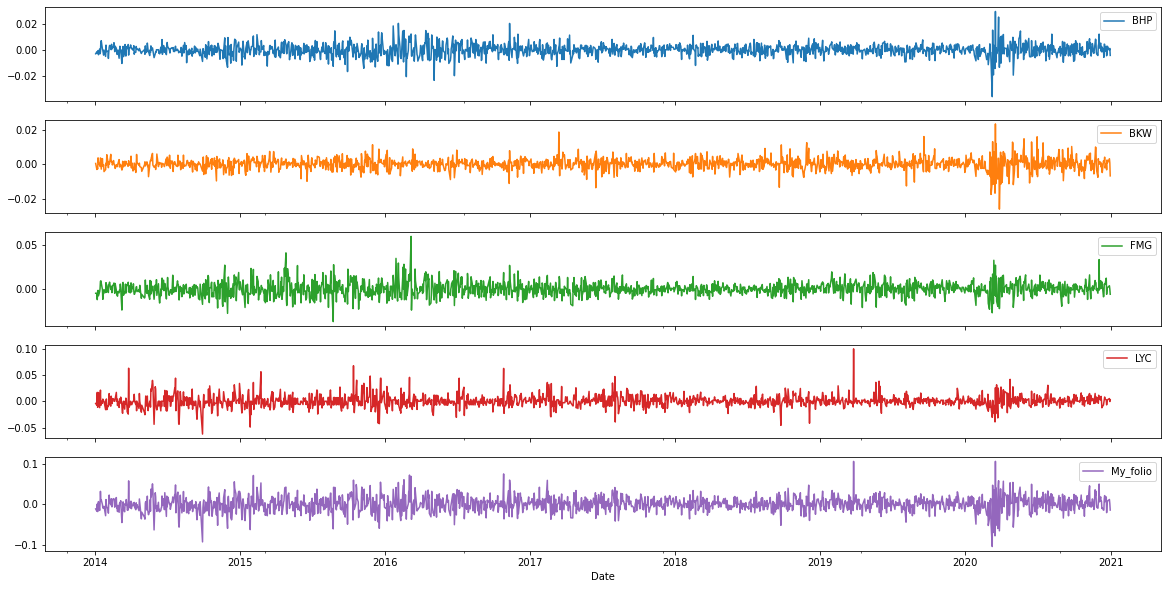

In [129]:
# multiply returns by weights across data (if cumulative product is being calculated, this must be done before weights are applied)
my_folio = my_folio.multiply(weights.iloc[0], axis ='columns')

# generate a portfolio column as the sum of all returns for the day
my_folio['My_folio'] = my_folio.sum(axis = 1)
my_folio.plot(subplots = True, figsize = (20,10))

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [130]:
# Join my_folio column to the original returns DataFrame
all_returns = pd.concat([analysis, my_folio['My_folio']], axis = 'columns', join='inner')
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX,My_folio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,-0.018096
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,-0.014598
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,0.003822
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.026992
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,-0.012059


In [131]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns = all_returns.dropna()
all_returns.isnull().sum().sum()

0

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

(<AxesSubplot:>,
 PAULSON & CO.INC.              0.111026
 SP TSX                         0.111695
 Algo 1                         0.120820
 SOROS FUND MANAGEMENT LLC      0.123870
 Algo 2                         0.132304
 TIGER GLOBAL MANAGEMENT LLC    0.172731
 BERKSHIRE HATHAWAY INC         0.204389
 My_folio                       0.284395
 dtype: float64)

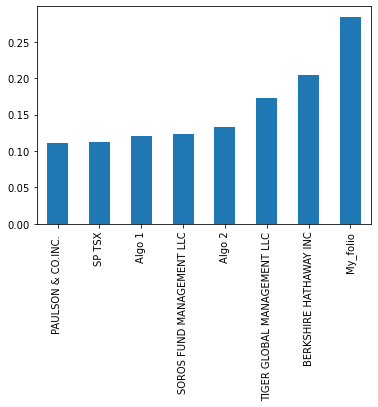

In [132]:
# Calculate the annualized std and sort values
all_ann_std = all_returns.std() * np.sqrt(252)
all_ann_std = all_ann_std.sort_values(ascending=True)

# display data and plot
all_ann_std.plot(kind = 'bar'), all_ann_std

### Calculate and plot rolling `std` with 21-day window

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

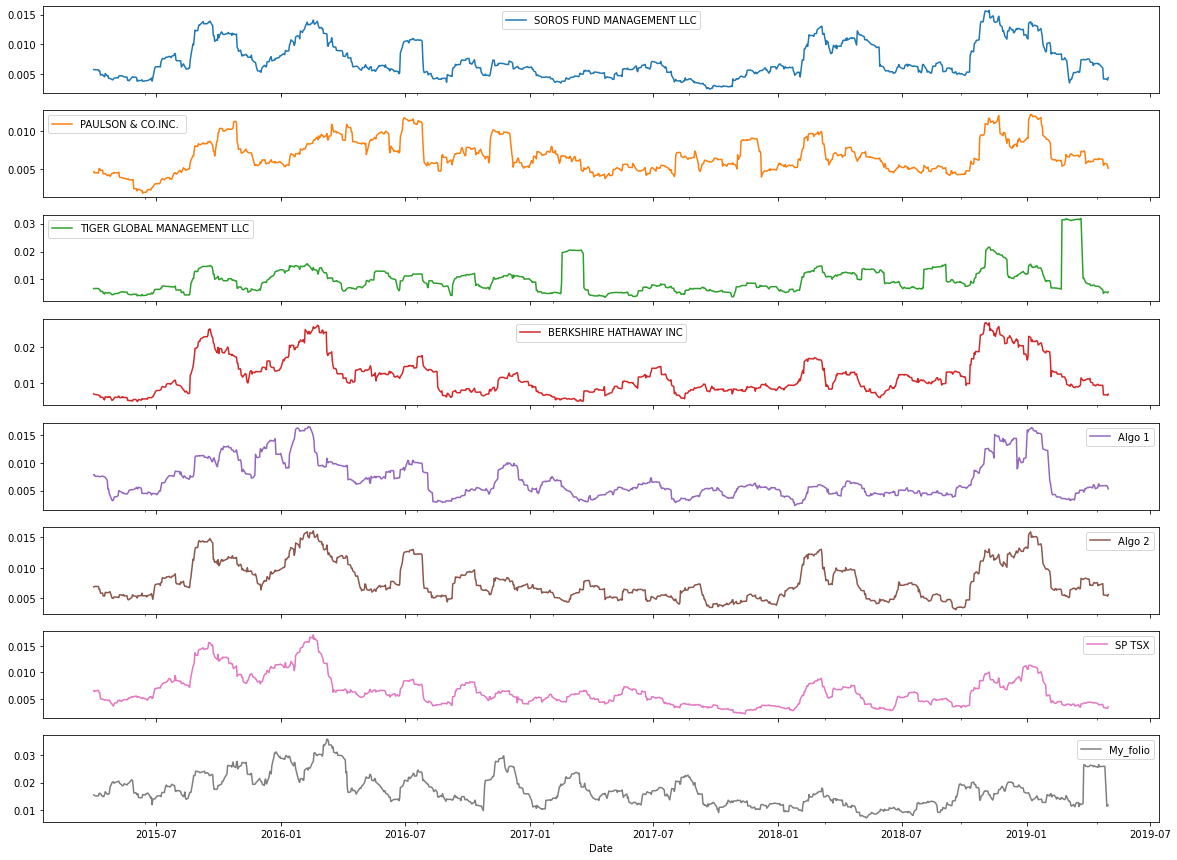

In [133]:
# Calculate rolling standard deviation
all_rolling_std_dev = all_returns.rolling(window=21).std()

# Plot the rolling standard deviation
all_rolling_std_dev.plot(subplots = True, figsize = (20,15))

### Calculate and plot the correlation

In [134]:
# calculate overall correlation between my portfolio and SP TSX 60
correlation = all_returns['My_folio'].corr(all_returns['SP TSX'])
correlation

0.19093628369723764

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

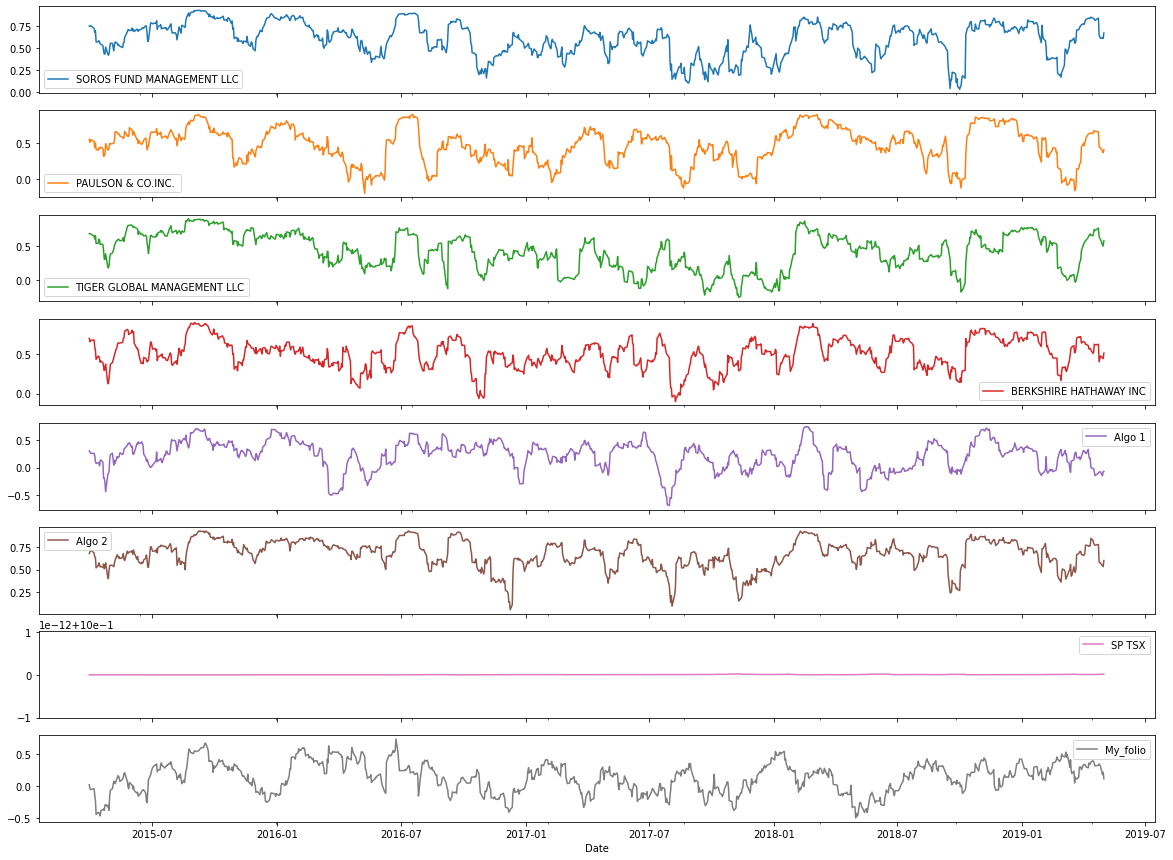

In [135]:
# Calculate and plot the rolling correlation
all_rolling_corr = all_returns.rolling(window=21).corr(all_returns['SP TSX'])
all_rolling_corr.plot(subplots = True, figsize = (20,15))

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

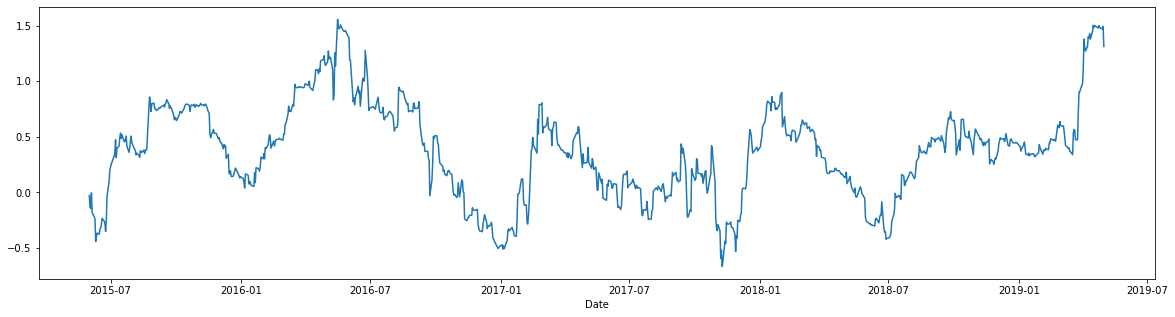

In [136]:
# Calculate and plot Beta
# calculate rolling covariance between my folio and SP TSX 60
my_folio_rolling_cov = all_returns['My_folio'].rolling(window=60).cov(all_returns['SP TSX'])

# Calculate variance of S&P TSX
tsx_rolling_var = all_returns['SP TSX'].rolling(window=60).var()

# Compute beta
rolling_beta = my_folio_rolling_cov/tsx_rolling_var

# Plot beta trend
rolling_beta.plot(figsize = (20,5))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

(<AxesSubplot:>,
 PAULSON & CO.INC.             -0.456960
 TIGER GLOBAL MANAGEMENT LLC   -0.142341
 SP TSX                         0.228388
 SOROS FUND MANAGEMENT LLC      0.315727
 Algo 2                         0.440470
 BERKSHIRE HATHAWAY INC         0.502023
 My_folio                       0.911048
 Algo 1                         1.523093
 dtype: float64)

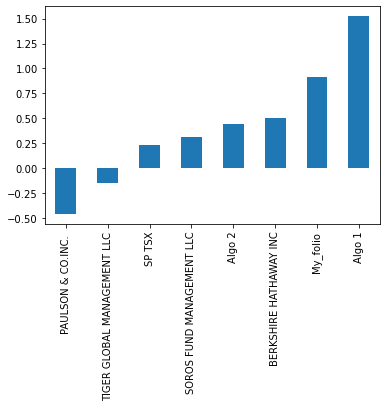

In [137]:
# Calculate Annualized Sharpe Ratios, sort values and plot
sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios = sharpe_ratios.sort_values(ascending=True)

# display data and plot
sharpe_ratios.plot(kind = 'bar'), sharpe_ratios

### How does your portfolio do?

---

### My Portfolio

##### Risk:
My portfolio has an annual standard deviation 0.2844 (156.4% above the SP TSX), making this portfolio the most volatile in\
comparison to all other strategies that have been analyzed.

##### Correlation:
This portfolio has an overall correlation to the SP TSX 60 of 0.19, making it the least correlated of all profiles,\
much like Algo 1, the portfolio displays negative values on the 21 day rolling correlation and the 60 day rolling beta.

##### Returns:
My portfolio had returns of 95.53% in the 2015 - 2019 period, placing it just shy of Algo 1 in overall performance.

##### Sharpe ratio:
A sharpe ratio of 0.91 demonstrates an acceptable return considering the above average risk profile for this portfolio. 

##### Discussion:
Overall, this portfolio displayed good returns, and low correlation to the market, however, the low correlation may be due\
to the comparison of australian stocks with the canadian stock index. The high risk nature of the profile may be unreasonable\
for particular applications but could be suggested as a good start for a growth portfolio.  